In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load all data
#We can use the read_csv() function to load the data
dataset = pd.read_csv('press1.csv', infer_datetime_format=True, index_col=['Datetime'])
dataset = dataset.sort_values(by="Datetime")
dataset = dataset.drop(dataset.columns[0],axis = 1)

# summarize
print(dataset.shape)
print(dataset.head())
dataset

(2130, 1)
                             hp1
Datetime                        
2017-01-01 00:00:00  1361.619196
2017-01-01 07:24:19  1458.532174
2017-01-01 16:55:11  1422.418272
2017-01-02 00:00:00  1356.589000
2017-01-02 00:25:34  1452.569763


,hp1
Datetime,
2017-01-01 00:00:00,1361.619196
2017-01-01 07:24:19,1458.532174
2017-01-01 16:55:11,1422.418272
2017-01-02 00:00:00,1356.589000
2017-01-02 00:25:34,1452.569763
2017-01-02 10:36:08,1455.724730
2017-01-03 00:00:00,1501.075197
2017-01-04 00:00:00,1365.320343
2017-01-05 00:00:00,1452.806603


In [2]:
dataset.describe()

,hp1
count,2130.000000
mean,1471.936433
std,77.271998
min,1130.678390
25%,1433.460510
50%,1465.984200
75%,1510.801672
max,1796.515725


In [3]:
# resample data to daily
dataset.index = pd.to_datetime(dataset.index)

day_groups = dataset.resample('D')
dataset = day_groups.mean()

# make dataset numeric
dataset = dataset.astype('float32')

dataset

# dataset = dataset.reset_index(drop=True)
# dataset.to_csv("press1_d.csv")

,hp1
Datetime,
2017-01-01,1414.189941
2017-01-02,1421.627808
2017-01-03,1501.075195
2017-01-04,1365.320312
2017-01-05,1455.590088
2017-01-06,1381.967529
2017-01-07,1424.075073
2017-01-08,1467.900391
2017-01-09,1513.349365


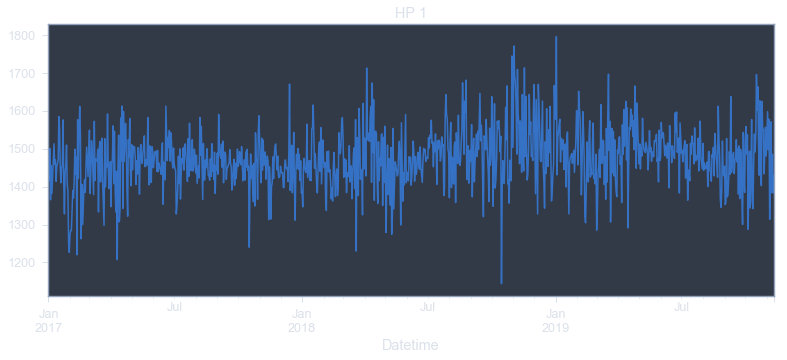

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

ax = plt.gca()

dataset['hp1'].plot(figsize=(13, 5), title = 'HP 1', ax = ax)

plt.show()

In [5]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(dataset['hp1'])

adf_test

# ADF -4.24, p-value = 0.00054
#
#We can see that the ADF value (the first value in the result) is -4.24) and the p-value (the 2nd value) is 0.00054. 
#ADF of less than the value of 0.00054 suggests that we can reject the null hypothesis with a significance
#level of less than 1% (i.e. a low probability that the result is a statistical fluke). 
#Rejecting the null hypothesis means that the process has no unit root, and that the time series is 
#stationary or does not have time-dependent structure.

(-5.812207622135935,
 4.3747825461177864e-07,
 15,
 1029,
 {'1%': -3.436720930946538,
  '10%': -2.56826769663245,
  '5%': -2.8643528789984187},
 11713.184125875849)

In [6]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(dataset['hp1'])

kpss_test

#Since the p-value is 0.01, the null hypothesis is not rejected at the usual 1% level.

/usr/local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.5483722743848582,
 0.01,
 22,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [7]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import warnings

warnings.filterwarnings('ignore')

# The dates of the anomaly events:
# 4/17/2017 13:05
# 2/28/2018 16:20
# 5/14/2018 12:00
# 6/30/2018 20:45

d = "6/30/2018"
date = pd.to_datetime(d)

#offset value of days
td = pd.offsets.DateOffset(days=60)

#offset value for the rolling mean calculation
rm_window = pd.offsets.DateOffset(days=7)

#use n days before and after the event
start = date - td - rm_window
# end = date + td

# use only the first n days days before the event
end = date

test = dataset.loc[start:end].hp1.values
train = dataset.loc['2019-01-01':].hp1.values

train_log, test_log = np.log10(train), np.log10(test)

In [8]:
model_order = (1, 1, 1)
model_seasonal_order = (0, 0, 0, 1)

In [9]:
test.shape

(68,)

In [10]:
train.shape

(315,)

predicted=3.167964, expected=3.162850
predicted=3.168848, expected=3.186798
predicted=3.173209, expected=3.187367
predicted=3.173987, expected=3.130424
predicted=3.163678, expected=3.184747
predicted=3.172383, expected=3.149590
predicted=3.166534, expected=3.193050
predicted=3.173546, expected=3.154404
predicted=3.167637, expected=3.106831
predicted=3.158254, expected=3.153656
predicted=3.164281, expected=3.178883
predicted=3.168501, expected=3.139546
predicted=3.161650, expected=3.168549
predicted=3.165821, expected=3.159132
predicted=3.164198, expected=3.130727
predicted=3.158422, expected=3.177102
predicted=3.165440, expected=3.105253
predicted=3.152615, expected=3.120719
predicted=3.150853, expected=3.191434
predicted=3.162771, expected=3.127563
predicted=3.152572, expected=3.147244
predicted=3.153769, expected=3.166061
predicted=3.156742, expected=3.163375
predicted=3.157159, expected=3.159494
predicted=3.157012, expected=3.154811
predicted=3.156386, expected=3.156268
predicted=3.

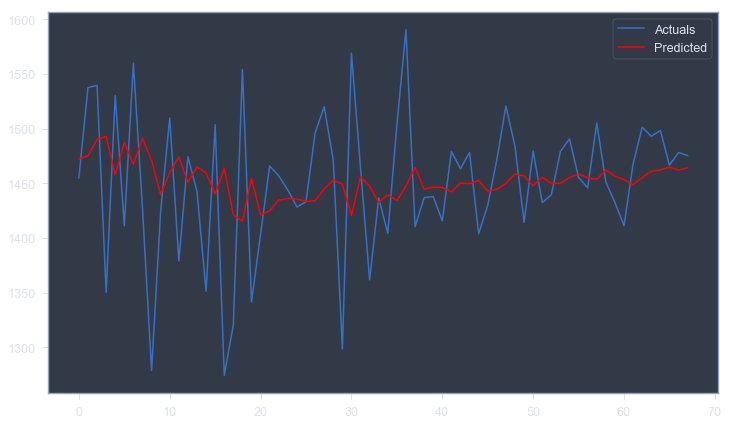

In [11]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    model = sm.tsa.SARIMAX(history, order=model_order, seasonal_order=model_seasonal_order, enforce_stationarity=False,enforce_invertibility=False)
#     model = sm.tsa.ARIMA(history, order=model_order)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))
error = math.sqrt(mean_squared_error(test_log, predict_log))
print('Test rmse: %.3f' % error)

figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
# acf and pacf plots of total power
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#We can calculate the correlation for time series observations with the use of obervations of lags. 
#We can then create a single figure that contains both an ACF and a PACF plot. 
#The number of lag time steps can be specified, in our case we fix it to 365 days of observations (365 days).
#The ACF plot indicates that there is a strong autocorrelation component,
#The PACF plot indicates that this component is distinct for the approximatelly 1 lag of observations.

# plots
pyplot.figure(figsize=(11,7))
lags = 30 #365

# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(dataset['hp1'], ax=axis, lags=lags)

# pacf
axis = pyplot.subplot(2, 1, 2)

plot_pacf(dataset['hp1'], ax=axis, lags=lags)
# show plot
pyplot.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

#Since the plots above are quite dense, we can and change the number of lag observations 
#from 365 to 30 to zoom in the plot.
#We can see that a good starting point would be an autoregressive model with 1 lag obervations used as a parameter.

lags = 30

plot_acf(dataset['hp1'], lags=lags)
plt.show()

In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log, start_p=0, start_q=0, 
                           max_p=10, max_q=10, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

#about parameters: http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html

In [ ]:
import itertools
import warnings

# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [12]:
predicted_df=pd.DataFrame()
predicted_df['datetime']=dataset.loc[start:end].index
predicted_df['actuals']=test
predicted_df['predicted']=predictions
predicted_df.reset_index(inplace=True)
del predicted_df['index']

predicted_df.head()
predicted_df

,datetime,actuals,predicted
0,2018-04-24,1454.957764,1472.191409
1,2018-04-25,1537.439331,1475.191417
2,2018-04-26,1539.456177,1490.077449
3,2018-04-27,1350.282104,1492.750923
4,2018-04-28,1530.196655,1457.731417
5,2018-04-29,1411.206421,1487.246742
6,2018-04-30,1559.730835,1467.350859
7,2018-05-01,1426.932983,1491.235771
8,2018-05-02,1278.883423,1471.083427
9,2018-05-03,1424.478760,1439.638902


In [13]:
import numpy as np
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='datetime', ascending=False)
    df.datetime = pd.to_datetime(df['datetime'].astype(str), format="%Y-%m-%d")

    return df


In [14]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot

def plot_anomaly(df,metric_name):
    dates = df.datetime
    bool_array = (abs(df['anomaly_points']) > 0)

    #add a subplot of the Actual Values.
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan

    color_map= {0: 'rgb(228, 222, 249)', 1: "yellow", 2: "orange", 3: "red"}
    table = go.Table(
    domain=dict(x=[0, 1],
                y=[0, 0.3]),
    columnwidth=[1, 2 ],
    header = dict(height = 20,
                  values = [['<b>Date</b>'],['<b>Actual Values </b>'],
                            ['<b>Predicted</b>'], ['<b>% Difference</b>'],['<b>Severity (0-3)</b>']],
                 font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                  fill = dict(color='#d562be')),
    cells = dict(values = [df.round(3)[k].tolist() for k in ['datetime', 'actuals', 'predicted',
                                                               'percentage_change','color']],
                 line = dict(color='#506784'),
                 align = ['center'] * 5,
                 font = dict(color=['rgb(40, 40, 40)'] * 5, size=12),

                 suffix=[None] + [''] + [''] + ['%'] + [''],
                 height = 27,
                 fill=dict(color=
                      [df['color'].map(color_map)],
                      )
    ))


    anomalies = go.Scatter(name="Anomaly",
                       x=dates,
                       xaxis='x1',
                       yaxis='y1',
                       y=df['anomaly_points'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))

    upper_bound = go.Scatter(hoverinfo="skip",
                         x=dates,
                         showlegend =False,
                         xaxis='x1',
                         yaxis='y1',
                         y=df['3s'],
                         marker=dict(color="#444"),
                         line=dict(
                             color=('rgb(23, 96, 167)'),
                             width=2,
                             dash='dash'),
                         fillcolor='rgba(68, 68, 68, 0.3)',
                         fill='tonexty')

    lower_bound = go.Scatter(name='Confidence Interval',
                          x=dates,
                         xaxis='x1',
                         yaxis='y1',
                          y=df['-3s'],
                          marker=dict(color="#444"),
                          line=dict(
                              color=('rgb(23, 96, 167)'),
                              width=2,
                              dash='dash'),
                          fillcolor='rgba(68, 68, 68, 0.3)',
                          fill='tonexty')

    Actuals = go.Scatter(name= 'Actuals',
                     x= dates,
                     y= df['actuals'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))

    Predicted = go.Scatter(name= 'Predicted',
                     x= dates,
                     y= df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))



    # create plot for error
    Error = go.Scatter(name="Error",
                   x=dates, y=df['error'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='line',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")



    anomalies_map = go.Scatter(name = "anomaly actual",
                                   showlegend=False,
                                   x=dates,
                                   y=anomaly_points,
                                   mode='markers',
                                   xaxis='x2',
                                   yaxis='y2',
                                    marker = dict(color ="red",
                                  size = 11,
                                 line = dict(
                                     color = "red",
                                     width = 2)))

    Mvingavrg = go.Scatter(name="Moving Average",
                           x=dates,
                           y=df['meanval'],
                           mode='line',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color="green"),
                           text="Moving average")

    axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True,
    ticklen=4,
    gridcolor='#ffffff',
    tickfont=dict(size=10))

    layout = dict(
    width=1000,
    height=865,
    autosize=False,
    title= metric_name,
    margin = dict(t=75),
    showlegend=True,
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2', showticklabels=True)),
    yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20 + 0.09, 1], anchor='x1', hoverformat='.2f')),
    yaxis2=dict(axis, **dict(domain=[0.21 + 0.12, 2 * 0.31 + 0.02], anchor='x2', hoverformat='.2f')))

    fig = go.Figure(data = [table,anomalies,anomalies_map,
                        upper_bound,lower_bound,Actuals,Predicted,
                        Mvingavrg,Error], layout = layout)
    
    plot(fig)
    pyplot.show()

In [18]:
classify_df=detect_classify_anomalies(predicted_df,7)
classify_df.reset_index(inplace=True)
del classify_df['index']

classify_df.head()
classify_df

,datetime,actuals,predicted,error,percentage_change,meanval,deviation,-3s,3s,-2s,2s,-1s,1s,impact,color,region,anomaly_points
0,2018-06-30,1475.329590,1464.062885,11.266705,0.763674,23.216562,15.489753,-7.762944,54.196067,-3.890506,50.323629,-0.018068,46.451191,3,0,NEGATIVE,NaN
1,2018-06-29,1478.042358,1461.983489,16.058870,1.086496,15.602024,29.293632,-42.985240,74.189288,-35.661832,66.865880,-28.338424,59.542472,4,0,POSITIVE,NaN
2,2018-06-28,1466.606079,1464.783645,1.822434,0.124262,9.848509,32.919665,-55.990820,75.687838,-47.760904,67.457922,-39.530988,59.228006,3,0,NEGATIVE,NaN
3,2018-06-27,1498.206787,1462.080584,36.126203,2.411296,8.027680,33.778867,-59.530053,75.585414,-51.085337,67.140697,-42.640620,58.695980,4,0,POSITIVE,NaN
4,2018-06-26,1492.961792,1460.866779,32.095013,2.149754,10.211267,36.298088,-62.384909,82.807444,-53.310387,73.732922,-44.235865,64.658400,4,0,POSITIVE,NaN
5,2018-06-25,1501.197510,1455.072966,46.124543,3.072517,4.310902,35.496007,-66.681112,75.302915,-57.807110,66.428914,-48.933108,57.554912,4,0,POSITIVE,NaN
6,2018-06-24,1467.674438,1448.652275,19.022164,1.296075,-2.731214,30.332179,-63.395572,57.933144,-55.812527,50.350099,-48.229482,42.767054,4,0,POSITIVE,NaN
7,2018-06-23,1411.238770,1453.273828,-42.035059,-2.978593,-0.410322,32.795585,-66.001492,65.180847,-57.802596,56.981951,-49.603700,48.783055,3,0,NEGATIVE,NaN
8,2018-06-22,1432.321533,1456.537267,-24.215734,-1.690663,9.768879,28.499380,-47.229882,66.767639,-40.105037,59.642794,-32.980192,52.517949,3,0,NEGATIVE,NaN
9,2018-06-21,1451.149170,1462.072540,-10.923370,-0.752739,11.738345,26.137954,-40.537563,64.014253,-34.003074,57.479764,-27.468586,50.945276,3,0,NEGATIVE,NaN


In [19]:
plot_anomaly(classify_df.iloc[:-7,:],"Pressure 1")

In [17]:
classify_df.iloc[:-7,:].shape

(61, 17)

In [ ]:
#ignore the code below

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# #cross validation

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# tscv = TimeSeriesSplit(n_splits = 3)
# rmse = []
# predictions = list()

# for train_index, test_index in tscv.split(train):
#     cv_train, cv_test = train[train_index], train[test_index]

#     for t in range(len(train)-1):
#         c = ARIMA(train[t], order=(1,0,0)).fit(disp=False)
#         yhat = model.predict(len(train[t]), len(train[t])+6)
#         predictions.append(yhat)
#         rmse.append(mean_squared_error(train[t+1], yhat))
        
# print("rmse score: {}".format(np.mean(rmse)))

In [ ]:
# classify_df=detect_classify_anomalies(predicted_df,7)
# classify_df.reset_index(inplace=True)
# del classify_df['index']
# plot_anomaly(classify_df,"Pressure 1")

In [ ]:
# resDiff = sm.tsa.arma_order_select_ic(train_log, max_ar=7, max_ma=7, ic='aic', trend='c')
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [ ]:
# from pmdarima.arima import auto_arima
# stepwise_model = auto_arima(history, start_p=0, start_q=0, 
#                            max_p=10, max_q=10,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

# #about parameters: http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html

In [ ]:
# # from statsmodels.tsa.arima_model import ARMAResults
# from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# #Running this prints a summary of the fit model. 
# #This summarizes the coefficient values used as BIC and AIC values.

# # print(ARMAResults.summary(model_fit))
# print(SARIMAXResults.summary(model_fit))

In [ ]:
# import itertools

# p = d = q = range(0, 3)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(history,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
#         except: 
#             continue